![tower_bridge](tower_bridge.jpeg)

As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `MLflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [77]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")



## Loading the data

In [78]:
#Reading in the data
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [79]:
#Determine the column names, data types, number of non-null 
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [80]:
weather.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

## Data cleaning

In [81]:
#Working with the date column
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')

In [82]:
#Extracting more date information
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month

## Exploratory data analysis

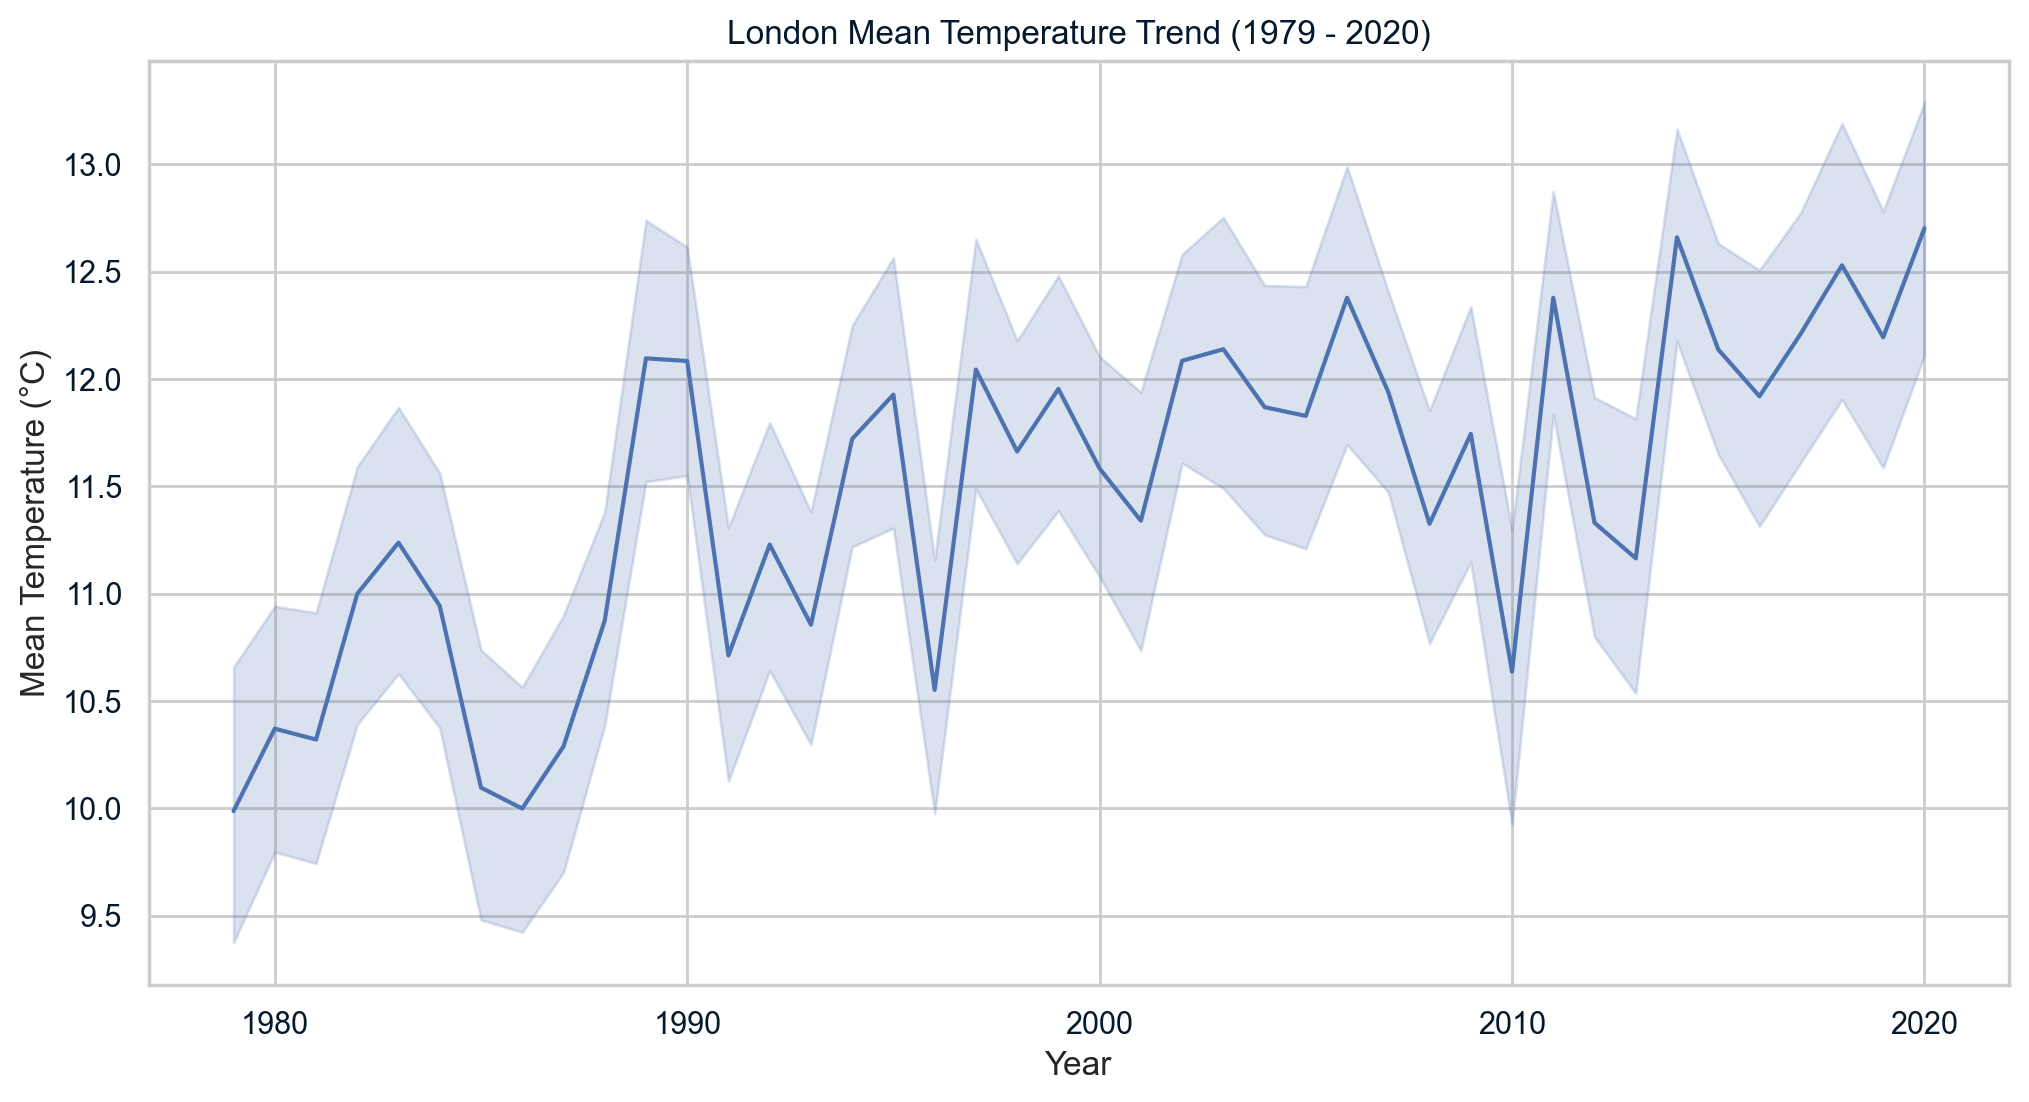

In [83]:
#Visualizing temperature
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather, x='year', y='mean_temp')
plt.title('London Mean Temperature Trend (1979 - 2020)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.show()

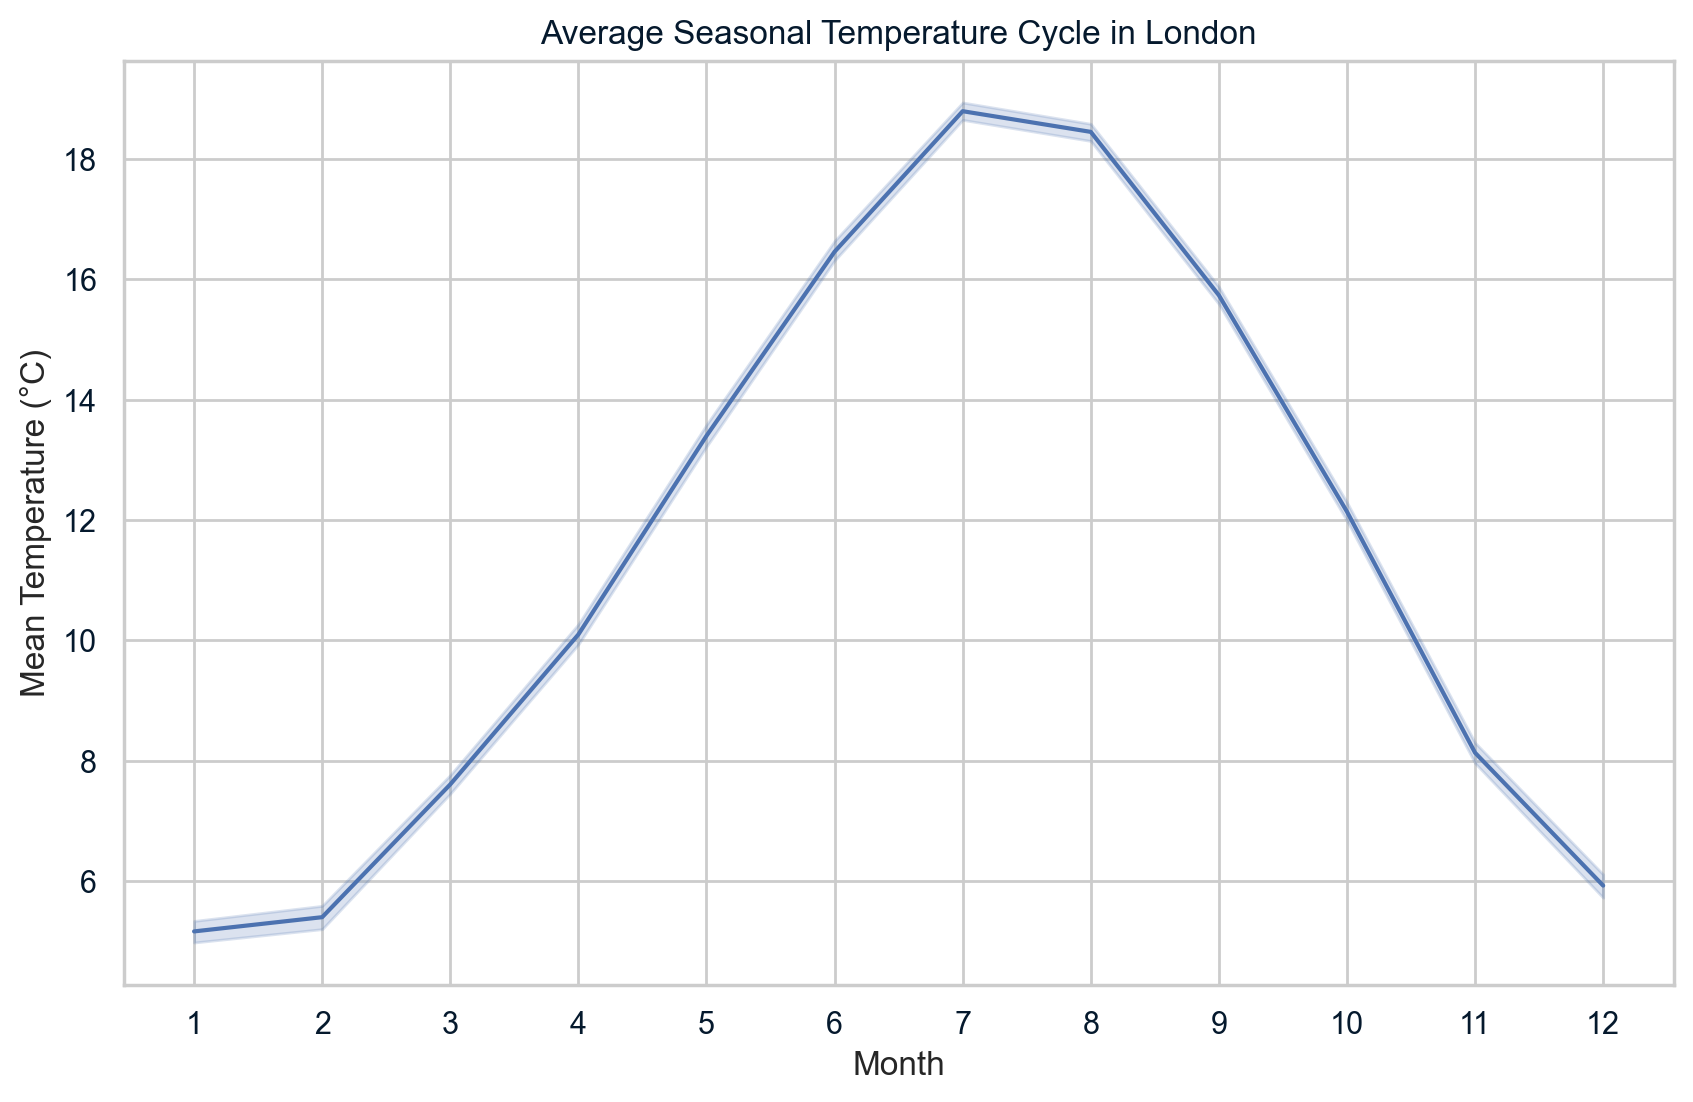

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather, x='month', y='mean_temp')
plt.title('Average Seasonal Temperature Cycle in London')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(range(1, 13)) # 
plt.show()

## Feature selection

In [85]:
#Filter features
feature_selection = ["global_radiation","sunshine","month","cloud_cover","precipitation","pressure"]
weather = weather.dropna(subset=['mean_temp'])
X = weather[feature_selection]
y = weather[["mean_temp"]]

## Preprocess data

## Machine learning training and evaluation

In [86]:
# Predict, evaluate, and log the parameters and metrics of your models
for idx, depth in enumerate ([1, 5]):
    run_name = f"run_{idx}"
    print(run_name)
    with mlflow.start_run(run_name = run_name):

        #Create models
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        
        #Log models
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")
    
        #Evaluate performance
        y_pred_lin_reg = lin_reg.predict(X_test)
        lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared = False)
        
        y_pred_tree_reg = tree_reg.predict(X_test)
        tree_reg_rmse = mean_squared_error(y_test, y_pred_tree_reg, squared = False)
        
        y_pred_forest_reg = forest_reg.predict(X_test)
        forest_reg_rmse = mean_squared_error(y_test, y_pred_forest_reg, squared=False)
        
        #Log performance
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_LR", lin_reg_rmse)
        mlflow.log_metric("rmse_TR", tree_reg_rmse)
        mlflow.log_metric("rmse_RF", forest_reg_rmse)

run_0
run_1


In [87]:
#Logging and evaluating
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_TR,metrics.rmse_RF,metrics.rmse_LR,params.max_depth,tags.mlflow.log-model.history,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type
0,68f8ca8dce3241ad9704dec26caa5f2a,0,FINISHED,file:///work/files/workspace/mlruns/0/68f8ca8d...,2026-02-01 12:25:24.393000+00:00,2026-02-01 12:25:33.509000+00:00,3.027733,2.967466,3.866773,5,"[{""run_id"": ""68f8ca8dce3241ad9704dec26caa5f2a""...",run_1,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
1,b0b51f201a3147f0ac27aa8d9765d812,0,FINISHED,file:///work/files/workspace/mlruns/0/b0b51f20...,2026-02-01 12:25:15.371000+00:00,2026-02-01 12:25:24.297000+00:00,4.752035,4.694655,3.866773,1,"[{""run_id"": ""b0b51f201a3147f0ac27aa8d9765d812""...",run_0,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
2,a500e538931a4a2296964244f075bdcd,0,FINISHED,file:///work/files/workspace/mlruns/0/a500e538...,2026-02-01 12:23:05.934000+00:00,2026-02-01 12:23:15.303000+00:00,3.027733,2.967466,3.866773,5,"[{""run_id"": ""a500e538931a4a2296964244f075bdcd""...",run_1,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
3,0bc2ba8db0b54ccc82d77e3630655a06,0,FINISHED,file:///work/files/workspace/mlruns/0/0bc2ba8d...,2026-02-01 12:22:57.271000+00:00,2026-02-01 12:23:05.803000+00:00,4.752035,4.694655,3.866773,1,"[{""run_id"": ""0bc2ba8db0b54ccc82d77e3630655a06""...",run_0,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
4,747b84af4a0744f2aff4b89a786182cd,0,FINISHED,file:///work/files/workspace/mlruns/0/747b84af...,2026-02-01 12:22:04.794000+00:00,2026-02-01 12:22:13.980000+00:00,3.027733,2.967466,3.866773,5,"[{""run_id"": ""747b84af4a0744f2aff4b89a786182cd""...",run_1,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
5,7e56e48c6c5844389408cbeab46d6cc2,0,FINISHED,file:///work/files/workspace/mlruns/0/7e56e48c...,2026-02-01 12:21:56.154000+00:00,2026-02-01 12:22:04.697000+00:00,4.752035,4.694655,3.866773,1,"[{""run_id"": ""7e56e48c6c5844389408cbeab46d6cc2""...",run_0,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
6,ed9f5b405fd047dc9d48b5b88ad7ab08,0,FINISHED,file:///work/files/workspace/mlruns/0/ed9f5b40...,2026-02-01 12:03:04.953000+00:00,2026-02-01 12:03:14.206000+00:00,3.027733,2.967466,3.866773,5,"[{""run_id"": ""ed9f5b405fd047dc9d48b5b88ad7ab08""...",run_1,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
7,1c23a34e01564a6ab9760a3b7d36964d,0,FINISHED,file:///work/files/workspace/mlruns/0/1c23a34e...,2026-02-01 12:02:56.268000+00:00,2026-02-01 12:03:04.833000+00:00,4.752035,4.694655,3.866773,1,"[{""run_id"": ""1c23a34e01564a6ab9760a3b7d36964d""...",run_0,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
8,4f7c9f77500646d0a61f3593a6748baf,0,FAILED,file:///work/files/workspace/mlruns/0/4f7c9f77...,2026-02-01 11:33:53.499000+00:00,2026-02-01 11:33:54.151000+00:00,NaN,NaN,NaN,None,None,run_0,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
9,094d0496d9d0470da07c2fadeb351138,0,FINISHED,file:///work/files/workspace/mlruns/0/094d0496...,2026-02-01 11:33:40.041000+00:00,2026-02-01 11:33:48.245000+00:00,0.615457,0.513537,0.525221,5,"[{""run_id"": ""094d0496d9d0470da07c2fadeb351138""...",run_1,repl,/usr/lib/python3/dist-packages/python_kernel/k...,LOCAL
